In [ ]:
# Create a dataset 

# Dataset Description
# You are provided with a dataset named ecommerce_data.csv containing the following columns:

# Order ID: Unique identifier for each order.
# Product: Name of the product purchased.
# Category: Product category (e.g., Electronics, Apparel, etc.).
# Quantity Ordered: Quantity of the product ordered.
# Price Each: Price per unit of the product.
# Order Date: Date and time when the order was placed.
# City: City where the order was placed.
# Customer ID: Unique identifier for the customer.

In [1]:
# Data Cleaning and Preparation
# a. Load the dataset into a Pandas DataFrame and display the first five rows.
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('ecommerce_data.csv')
# Display the first five rows of the DataFrame
print(df.head())

                               Order ID        Product     Category  \
0  c0999c96-9ec1-425a-adee-7ee3728d3fbb        Perfume       Beauty   
1  be972545-2bdf-4eca-8180-3c08ab6751d9  Tennis Racket       Sports   
2  9823634f-1eb0-4ca9-ba86-e72217fc07a9          Chair         Home   
3  875cb9fd-0ece-4ed9-9b3d-b4e58a401af2       Yoga Mat       Sports   
4  630160fa-094d-46d4-8052-2db59ecc9a4d     Headphones  Electronics   

   Quantity Ordered  Price Each           Order Date                  City  \
0                 5      497.97  2025-01-13 22:24:34          Port Richard   
1                 3      397.76  2025-01-19 02:24:45     Lake Heatherhaven   
2                 5      387.74  2025-01-09 14:50:25            New Daniel   
3                 2      406.39  2025-01-22 01:25:05             Wendybury   
4                 8      498.01  2025-01-11 00:59:34  Lake Christopherfurt   

                            Customer ID  
0  489ec240-27d1-44a5-960d-afae376cca4f  
1  cf0e0324-7f7a-4bf

In [2]:
# Check for missing or null values in the dataset. Handle these appropriately

# Check for missing or null values in the dataset
print(df.isnull().sum())

Order ID            0
Product             0
Category            0
Quantity Ordered    0
Price Each          0
Order Date          0
City                0
Customer ID         0
dtype: int64


In [3]:
# Convert columns to appropriate data types (e.g., Order Date to datetime).
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [5]:
# Create a new column, Total Price, which is the product of Quantity Ordered and Price Each
df['Total Price'] = df['Quantity Ordered'] * df['Price Each']

# print the first five rows of the updated DataFrame
print(df.head())

                               Order ID        Product     Category  \
0  c0999c96-9ec1-425a-adee-7ee3728d3fbb        Perfume       Beauty   
1  be972545-2bdf-4eca-8180-3c08ab6751d9  Tennis Racket       Sports   
2  9823634f-1eb0-4ca9-ba86-e72217fc07a9          Chair         Home   
3  875cb9fd-0ece-4ed9-9b3d-b4e58a401af2       Yoga Mat       Sports   
4  630160fa-094d-46d4-8052-2db59ecc9a4d     Headphones  Electronics   

   Quantity Ordered  Price Each          Order Date                  City  \
0                 5      497.97 2025-01-13 22:24:34          Port Richard   
1                 3      397.76 2025-01-19 02:24:45     Lake Heatherhaven   
2                 5      387.74 2025-01-09 14:50:25            New Daniel   
3                 2      406.39 2025-01-22 01:25:05             Wendybury   
4                 8      498.01 2025-01-11 00:59:34  Lake Christopherfurt   

                            Customer ID  Total Price  
0  489ec240-27d1-44a5-960d-afae376cca4f      2489.85  


In [6]:
# Sales Analysis
# Calculate the total revenue generated by the store.

# Calculate the total revenue generated by the store
total_revenue = df['Total Price'].sum()
print('Total Revenue:', total_revenue)

Total Revenue: 575106.19


In [7]:
#  Identify the top 5 products based on total sales revenue.
top_products = df.groupby('Product')['Total Price'].sum().nlargest(5)
print(top_products)

Product
Tennis Racket    40990.20
Headphones       39123.83
Perfume          36263.20
Football         28295.49
Smartphone       26740.34
Name: Total Price, dtype: float64


In [8]:
# Find the month with the highest sales and plot a graph to show monthly revenue.

# Extract the month from the Order Date column
df['Month'] = df['Order Date'].dt.month
# Group by month and calculate the total sales for each group
monthly_sales = df.groupby('Month')['Total Price'].sum()
print(monthly_sales)


Month
1    575106.19
Name: Total Price, dtype: float64


Month with the highest sales: 1


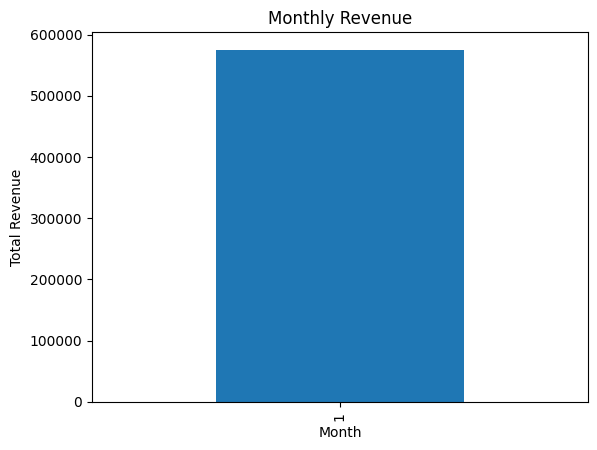

In [11]:
import matplotlib.pyplot as plt

# Find the month with the highest sales
highest_sales_month = monthly_sales.idxmax()
print('Month with the highest sales:', highest_sales_month)

# Plot the monthly revenue
monthly_sales.plot(kind='bar')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [ ]:
# Category and City Analysis

In [12]:
# Group the data by Category and calculate the total revenue for each category.
category_revenue = df.groupby('Category')['Total Price'].sum()
print(category_revenue)

Category
Apparel        109983.35
Beauty         113198.79
Electronics    129053.10
Home            97127.71
Sports         125743.24
Name: Total Price, dtype: float64


In [ ]:
 # Find the city with the highest number of orders
 

In [13]:
# Group the data by City and count the number of orders for each city
city_order_counts = df['City'].value_counts()
print(city_order_counts)

# Find the city with the highest number of orders
city_with_highest_orders = city_order_counts.idxmax()
print('City with the highest number of orders:', city_with_highest_orders)

City
Lake Michael     2
Port Daniel      2
Port Richard     1
Larryton         1
Parkerfort       1
                ..
Mcintoshton      1
Jeremyborough    1
North Lisa       1
Veronicashire    1
Benjaminton      1
Name: count, Length: 398, dtype: int64
City with the highest number of orders: Lake Michael


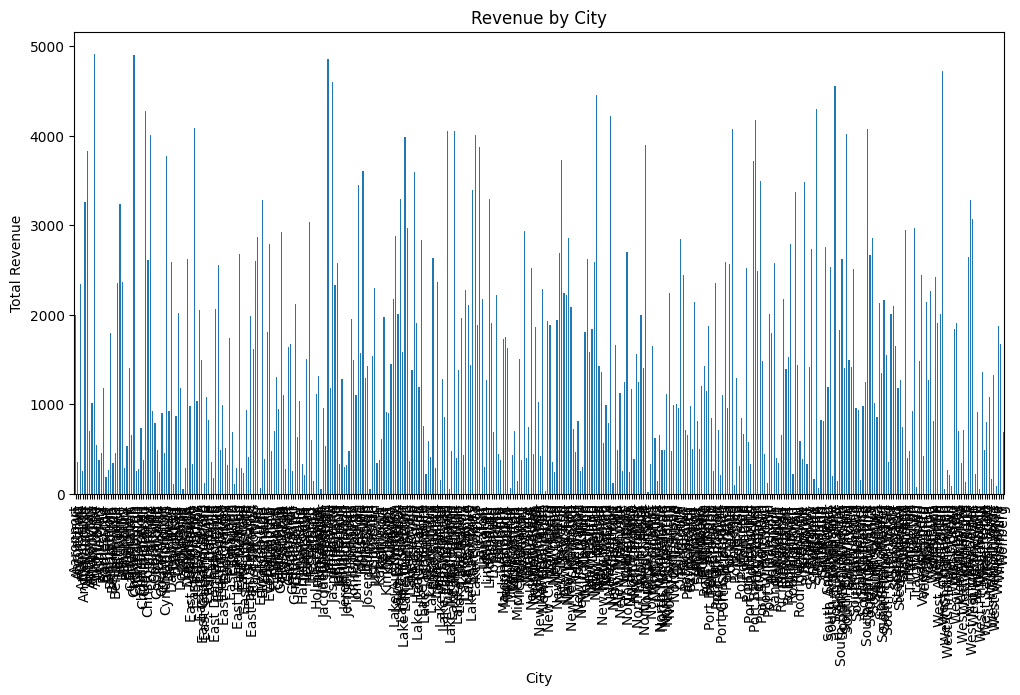

In [14]:
# Group the data by City and calculate the total revenue for each city
city_revenue = df.groupby('City')['Total Price'].sum()

# Plot the bar chart
city_revenue.plot(kind='bar', figsize=(12, 6))
plt.title('Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show()

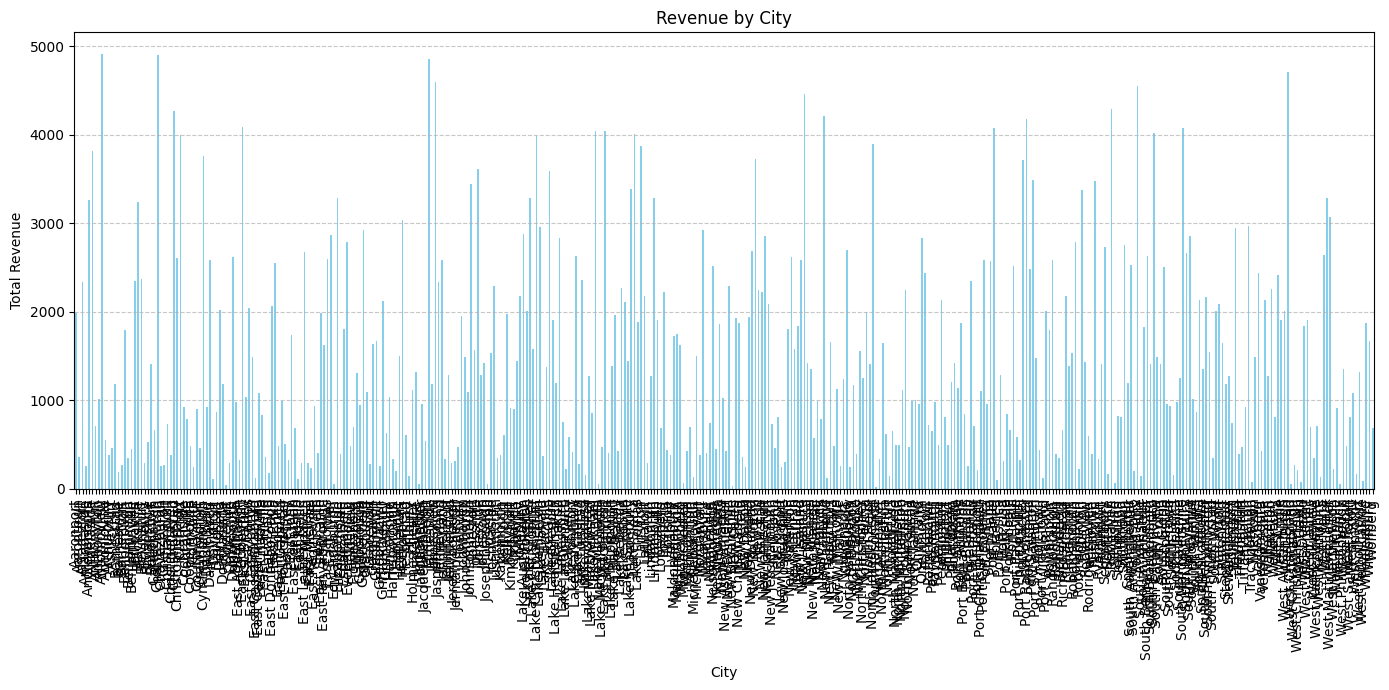

In [16]:
# Plot the bar chart with better visibility of city names
plt.figure(figsize=(14, 7))
city_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

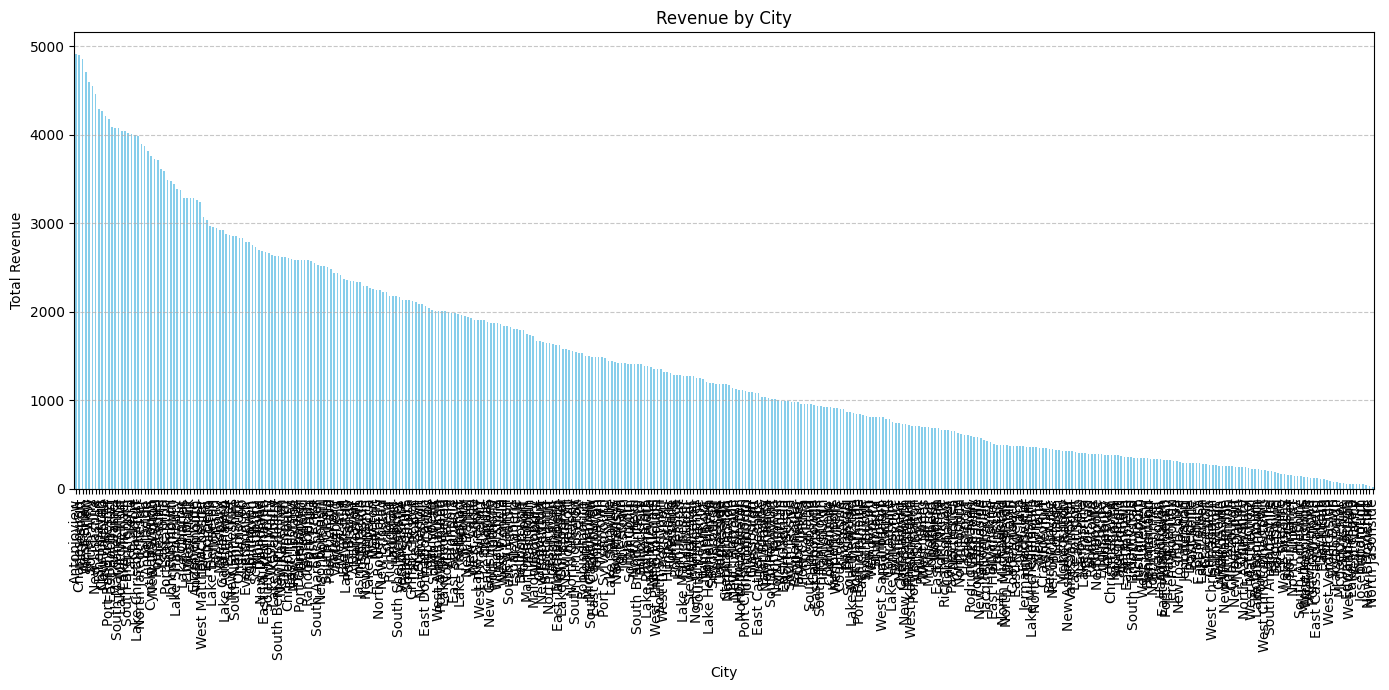

In [15]:
# Sort the city_revenue series by revenue
sorted_city_revenue = city_revenue.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 7))
sorted_city_revenue.plot(kind='bar', color='skyblue')
plt.title('Revenue by City')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
# Customer Behavior Analysis

# a. Identify the customer who spent the most money and calculate their total spending.
customer_spending = df.groupby('Customer ID')['Total Price'].sum()
top_customer = customer_spending.idxmax()
top_customer_spending = customer_spending.max()
print(f'Customer who spent the most money: {top_customer}')
print(f'Total spending of the top customer: {top_customer_spending}')

# b. Find the average order value (AOV) for all customers.
average_order_value = df['Total Price'].mean()
print(f'Average Order Value (AOV) for all customers: {average_order_value}')

# c. Determine the product most frequently purchased by customers.
most_frequent_product = df['Product'].value_counts().idxmax()
print(f'Product most frequently purchased by customers: {most_frequent_product}')

Customer who spent the most money: f0793d85-84fa-4440-87a3-607e38495d19
Total spending of the top customer: 4914.4
Average Order Value (AOV) for all customers: 1437.765475
Product most frequently purchased by customers: Headphones


In [ ]:

# Extract the hour from the Order Date column
df['Hour'] = df['Order Date'].dt.hour

# Group by hour and calculate the total sales for each group
hourly_sales = df.groupby('Hour')['Total Price'].sum()
print(hourly_sales)

# Find the hour with the highest sales
highest_sales_hour = hourly_sales.idxmax()
print('Hour with the highest sales:', highest_sales_hour)

# Create a visualization to show the distribution of sales by hour
plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='bar', color='skyblue')
plt.title('Sales Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
